In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Evtl. hat Azure nur 0.19, wir brauchen aber .20 für das Plotting, dann das hier installieren und Notebook neu starten
# !conda update pandas -y

In [5]:
import pandas as pd
print(pd.__version__)

0.19.2


# Plot randomly generated classification dataset

http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html

http://scikit-learn.org/stable/datasets/index.html#sample-generators

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

Plot several randomly generated 2D classification datasets.
This example illustrates the :func:`datasets.make_classification`
:func:`datasets.make_blobs` and :func:`datasets.make_gaussian_quantiles`
functions.

For ``make_classification``, three binary and two multi-class classification
datasets are generated, with different numbers of informative features and
clusters per class.  


In [6]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

# https://www.welt.de/motor/news/article156991316/Unfallstatistik-2015.html
# http://www.openculture.com/2017/12/why-incompetent-people-think-theyre-amazing.html
# 0: young drivers with fast cars: red
# 1: reasonable drivers: green
# 2: a little bit older, more kilometers, general noise: yellow
# 3: really old drivers: red
# 4: young drivers: red
# 5: another green just to have a counter part to all the red ones: green
# 6: people who do not drive a lot: green
# 7: people who drive a lot: yellow
# 8: young people with slow cars: yellow

centers = [(200, 35, 50), (160, 50, 25), (170, 55, 30), (170, 75, 20), (170, 30, 30), (190, 45, 40), (160, 40, 15), (180, 50, 45), (140, 25, 15)]
cluster_std = [4, 9, 18, 8, 9, 5, 8, 12, 5]

X, y = make_blobs(n_samples=300, n_features=3, centers=centers, random_state=42, cluster_std = cluster_std)

# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
# X, y = make_classification(n_features=3, n_redundant=0, n_informative=3,
#                              n_clusters_per_class=2, n_classes=3, random_state=42)

feature_names = ['max speed', 'age' ,'thousand km per year']
df = pd.DataFrame(X, columns=feature_names)
df = df.round()
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.clip.html

df['max speed'] = df['max speed'].clip(90,400)
df['age'] = df['age'].clip(18,90)
df['thousand km per year'] = df['thousand km per year'].clip(5,500)

X = df.as_matrix()

# merges clusters into one group
for group in np.nditer(y, op_flags=['readwrite']):
    if group == 3 or group == 4:
        group[...] = 0
    if group == 5 or group == 6:
        group[...] = 1
    if group == 7 or group == 8:
        group[...] = 2


In [7]:
df.describe()

,max speed,age,thousand km per year
count,300.000000,300.000000,300.000000
mean,171.863333,44.006667,31.220000
std,18.807545,16.191784,15.411792
min,132.000000,18.000000,5.000000
25%,159.000000,33.000000,18.000000
50%,171.000000,42.000000,30.000000
75%,187.000000,52.000000,43.000000
max,211.000000,90.000000,99.000000


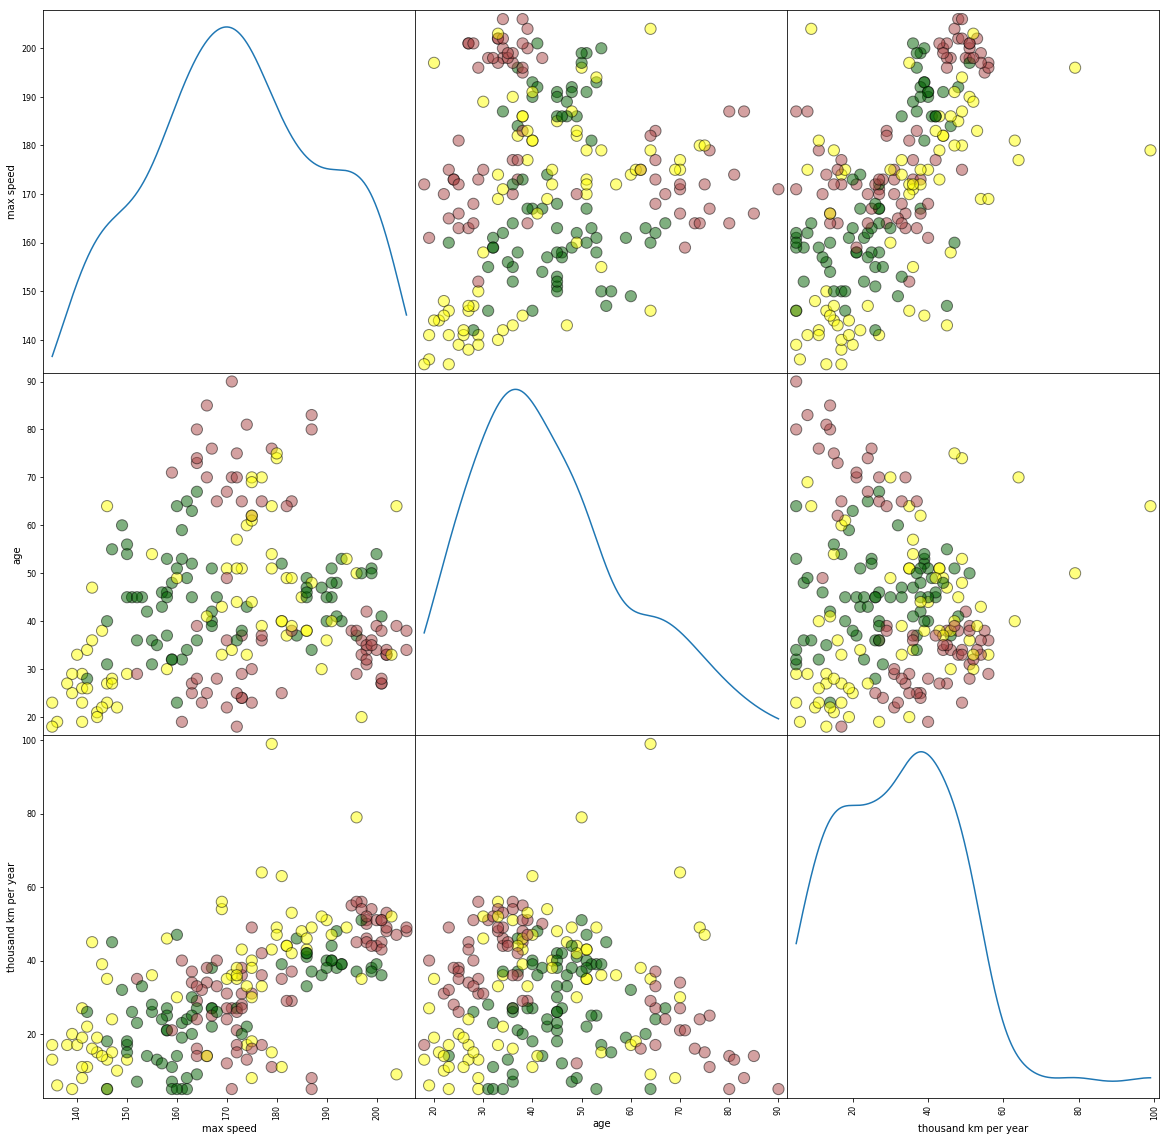

In [121]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.clf()
plt.figure(figsize=(20, 20))

CMAP = ListedColormap(['#AA4444', '#006000', '#FFFF00'])

pd.plotting.scatter_matrix(df, c=y, cmap=CMAP, s=500, edgecolor='black', figsize=(20, 20), diagonal='kde')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((180, 3), (180,), (120, 3), (120,))

In [11]:
from sklearn import neighbors

In [12]:
# ignore this, it is just technical code
# should come from a lib, consider it to appear magically 
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#AA4444', '#006000', '#AAAA00'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True):
    xx,yy = meshGrid(x_data, y_data)
    Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(20,10))
    if mesh:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)

In [13]:
X_train_kmh_age = X_train[:, :2]
X_test_kmh_age = X_test[:, :2]

In [114]:
X_train_2_dim = X_train_kmh_age
X_test_2_dim = X_test_kmh_age

In [115]:
X_train[0]

array([ 137.,   23.,   16.])

In [116]:
y_train[0]

2

In [259]:
# 0: red
# 1: green
# 2: yellow

class BaseLineClassifier:
    def predict(self, X):
        return np.array([ self.predict_single(x) for x in X])
    def score(self, X, y):
        n = len(y)
        correct = 0
        predictions = self.predict(X)
        for prediction, ground_truth in zip(predictions, y):
            if prediction == ground_truth:
                correct = correct + 1
        return correct / n
    def predict_single(self, x):
        try:
            speed, age, km_per_year = x
        except:
            speed, age = x
            km_per_year = 0
        if age < 25:
            if speed > 180:
                return 0
            else:
                return 2
        if age > 75:
            return 0
        if km_per_year > 50:
            return 0
        if km_per_year > 35:
            return 2
        return 1

In [260]:
base_clf = BaseLineClassifier()
base_clf.predict_single(X_train[0])

2

In [261]:
base_clf.predict_single(array([ 137.,   23.]))

2

In [262]:
samples = np.array([X_train[0], X_train[1]])
samples

array([[ 137.,   23.,   16.],
       [ 137.,   25.,   13.]])

In [263]:
ground_truth = np.array([y_train[0], y_train[1]])
ground_truth

array([2, 2])

In [264]:
base_clf.predict(samples)

array([2, 1])

In [265]:
base_clf.score(samples, ground_truth)

0.5

In [266]:
base_clf.score(X_train, y_train)

0.43333333333333335

In [267]:
base_clf.score(X_train_2_dim, y_train)

0.4111111111111111

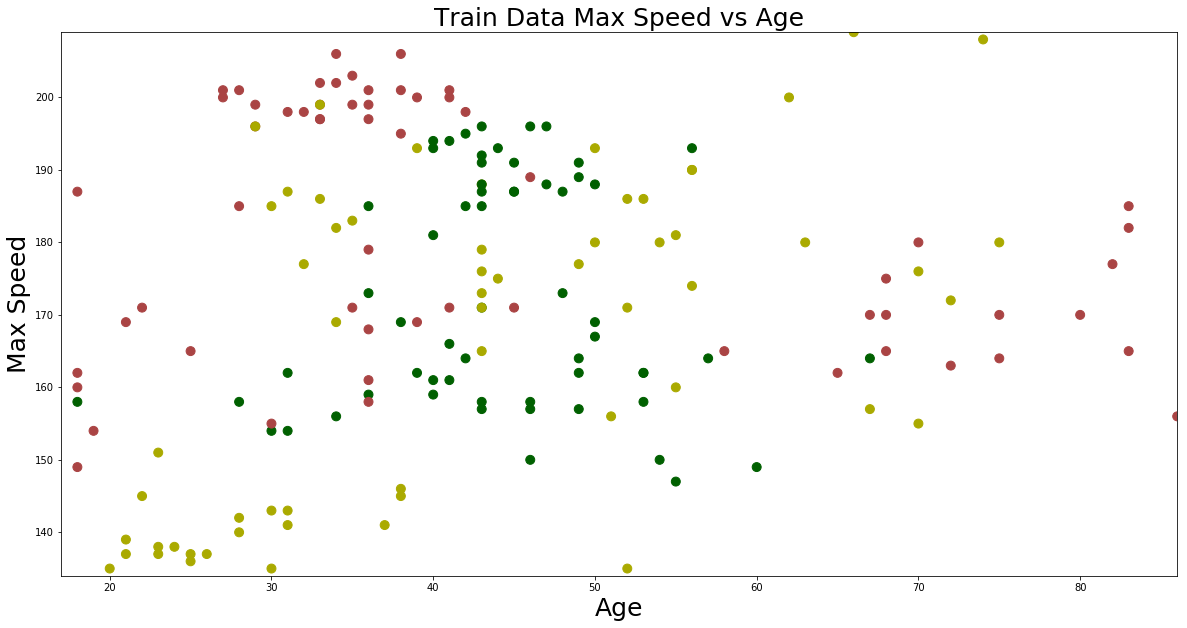

In [268]:
plotPrediction(base_clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train, mesh=False,
                title="Train Data Max Speed vs Age")

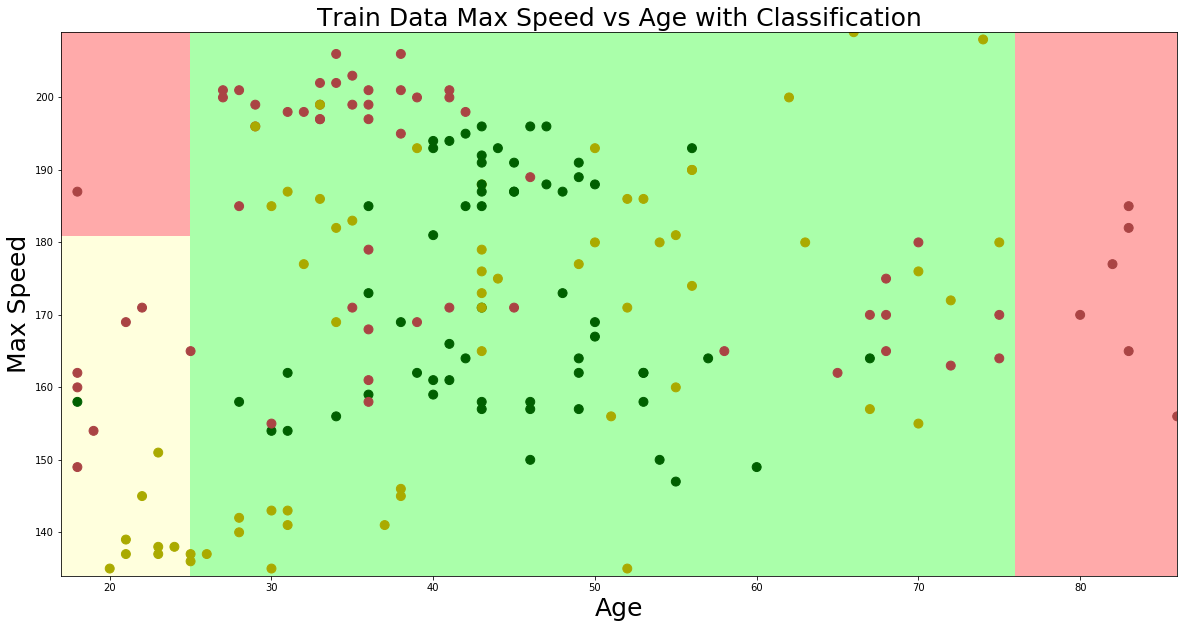

In [269]:
plotPrediction(base_clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

In [15]:
clf = neighbors.KNeighborsClassifier(1)
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 1.4 ms, sys: 336 µs, total: 1.73 ms
Wall time: 1.97 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

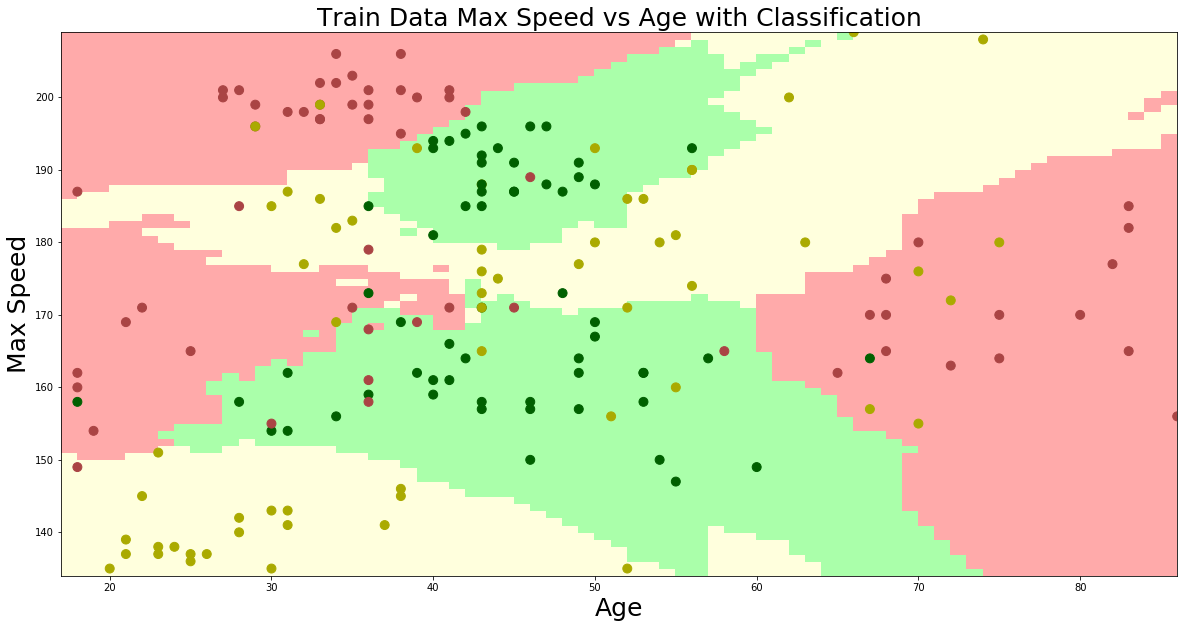

In [35]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

In [36]:
clf.score(X_train_2_dim, y_train)

0.81111111111111112

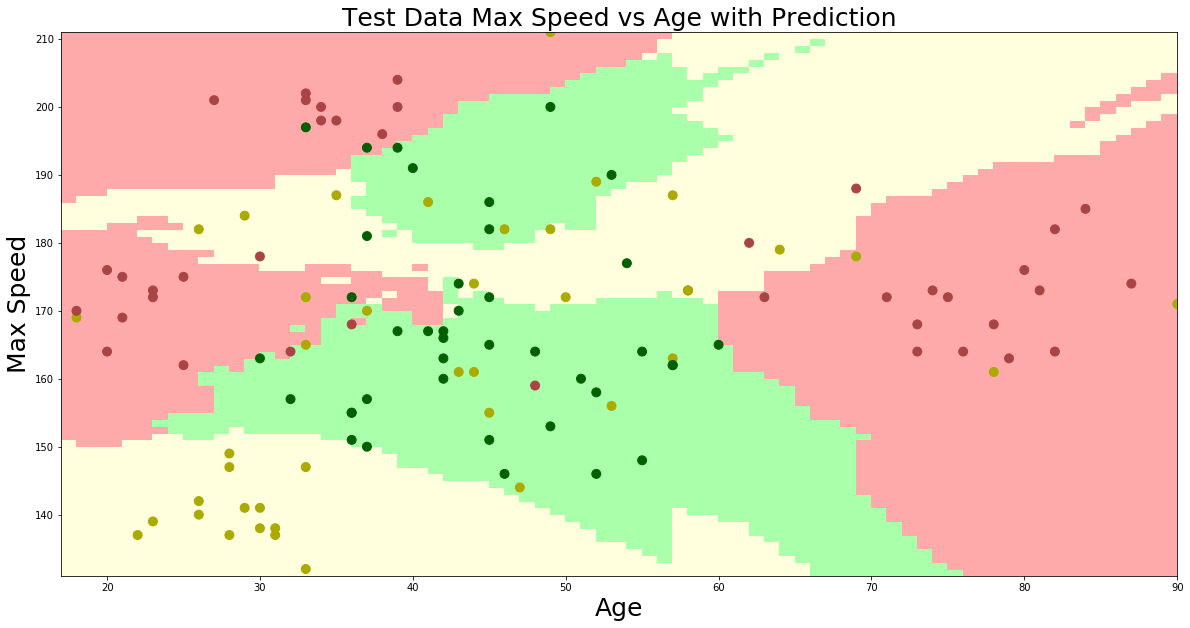

In [37]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [38]:
clf.score(X_test_2_dim, y_test)

0.7416666666666667

In [102]:
clf = neighbors.KNeighborsClassifier(13)
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 1.77 ms, sys: 0 ns, total: 1.77 ms
Wall time: 2.19 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

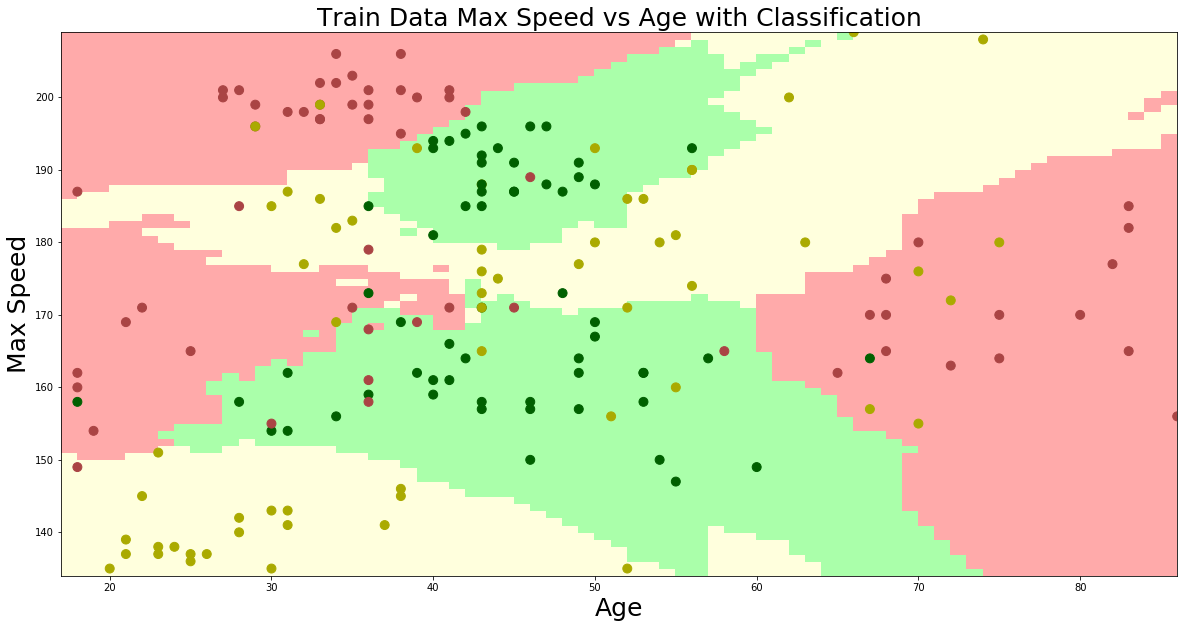

In [103]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

In [104]:
clf.score(X_train_2_dim, y_train)

0.81111111111111112

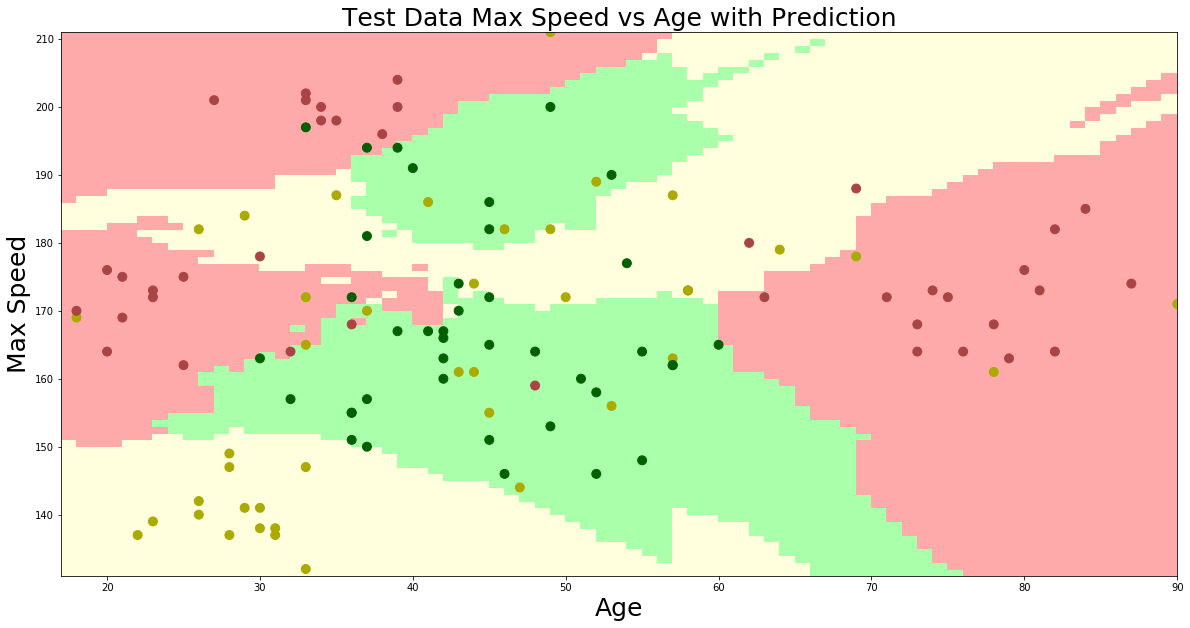

In [105]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [106]:
clf.score(X_test_2_dim, y_test)

0.7416666666666667

In [107]:
clf = neighbors.KNeighborsClassifier(13)
%time clf.fit(X_train, y_train)

CPU times: user 1.22 ms, sys: 106 µs, total: 1.32 ms
Wall time: 1.09 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [108]:
clf.score(X_train, y_train)

0.77777777777777779

In [109]:
clf.score(X_test, y_test)

0.75